In [77]:
import statsmodels.api as sm #for OLS regression
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt #for heatmap plotting
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns #for heatmap plotting
from statsmodels.iolib.summary2 import summary_col #to summarize multiple regressions in one table

In [12]:
p25 = pd.read_csv('C:/Users/yz2991/Desktop/25_Porfolio.csv')
ff3 = pd.read_csv('C:/Users/yz2991/Desktop/3 factor.csv')

In [13]:
#check the start and end of p25 
print(p25.head())
print(p25.tail())

   Unnamed: 0  SMALL LoBM  ME1 BM2  ME1 BM3  ME1 BM4  SMALL HiBM  ME2 BM1  \
0      192607      3.7782  -0.4119  -1.9434   0.3530      2.0534   2.1904   
1      192608     -2.2074  -8.7275   2.4404   0.6086      8.3968   2.1709   
2      192609     -6.2113  -0.2989  -6.1982  -1.6368      0.8649  -1.8550   
3      192610     -8.6241  -3.7532  -5.6719   5.7170     -2.5476  -1.7995   
4      192611      3.4744   6.6476   2.2634  -4.7020      0.5362   2.9051   

   ME2 BM2  ME2 BM3  ME2 BM4    ...     ME4 BM1  ME4 BM2  ME4 BM3  ME4 BM4  \
0   2.4192   0.4926  -1.5770    ...      1.5893   1.5278   1.1869   0.2727   
1  -1.1849   4.0084   0.4643    ...      1.3336   3.8730   2.0059   2.1706   
2  -1.2618   1.0829  -3.0405    ...      1.0923  -0.5250  -1.7314   1.4646   
3  -3.2663  -5.0745  -8.0450    ...     -3.3361  -2.6559  -2.0316  -3.1051   
4  -2.3690   3.0078   4.6649    ...      3.4448   2.3887   3.7403   4.9320   

   ME4 BM5  BIG LoBM  ME5 BM2  ME5 BM3  ME5 BM4  BIG HiBM  
0   2.46

In [14]:
#check the start and end of ff3
print(ff3.head())
print(ff3.tail())

   Unnamed: 0  Mkt-RF   SMB   HML    RF
0      192607    2.96 -2.30 -2.87  0.22
1      192608    2.64 -1.40  4.19  0.25
2      192609    0.36 -1.32  0.01  0.23
3      192610   -3.24  0.04  0.51  0.32
4      192611    2.53 -0.20 -0.35  0.31
      Unnamed: 0  Mkt-RF   SMB   HML    RF
1109      201812   -9.55 -2.58 -1.51  0.19
1110      201901    8.41  3.02 -0.60  0.21
1111      201902    3.40  2.02 -2.84  0.18
1112      201903    1.10 -3.15 -4.07  0.19
1113      201904    3.96 -1.69  1.99  0.21


In [15]:
#updated the field name of Year&month field
p25.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)
ff3.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)

In [16]:
#check the column names
print(ff3.columns)
print(p25.columns)

Index(['YYMM', 'Mkt-RF', 'SMB', 'HML', 'RF'], dtype='object')
Index(['YYMM', 'SMALL LoBM', 'ME1 BM2', 'ME1 BM3', 'ME1 BM4', 'SMALL HiBM',
       'ME2 BM1', 'ME2 BM2', 'ME2 BM3', 'ME2 BM4', 'ME2 BM5', 'ME3 BM1',
       'ME3 BM2', 'ME3 BM3', 'ME3 BM4', 'ME3 BM5', 'ME4 BM1', 'ME4 BM2',
       'ME4 BM3', 'ME4 BM4', 'ME4 BM5', 'BIG LoBM', 'ME5 BM2', 'ME5 BM3',
       'ME5 BM4', 'BIG HiBM'],
      dtype='object')


In [17]:
#to convert to decile format and get excess returns
ff3.iloc[:,1:ff3.shape[1]] = ff3.iloc[:,1:ff3.shape[1]]/100
p25_excess=(p25.iloc[:,1:p25.shape[1]]/100).sub(ff3.RF,axis=0)
print(p25_excess.head())

   SMALL LoBM   ME1 BM2   ME1 BM3   ME1 BM4  SMALL HiBM   ME2 BM1   ME2 BM2  \
0    0.035582 -0.006319 -0.021634  0.001330    0.018334  0.019704  0.021992   
1   -0.024574 -0.089775  0.021904  0.003586    0.081468  0.019209 -0.014349   
2   -0.064413 -0.005289 -0.064282 -0.018668    0.006349 -0.020850 -0.014918   
3   -0.089441 -0.040732 -0.059919  0.053970   -0.028676 -0.021195 -0.035863   
4    0.031644  0.063376  0.019534 -0.050120    0.002262  0.025951 -0.026790   

    ME2 BM3   ME2 BM4   ME2 BM5    ...      ME4 BM1   ME4 BM2   ME4 BM3  \
0  0.002726 -0.017970 -0.005544    ...     0.013693  0.013078  0.009669   
1  0.037584  0.002143  0.059175    ...     0.010836  0.036230  0.017559   
2  0.008529 -0.032705 -0.011701    ...     0.008623 -0.007550 -0.019614   
3 -0.053945 -0.083650 -0.016413    ...    -0.036561 -0.029759 -0.023516   
4  0.026978  0.043549  0.024192    ...     0.031348  0.020787  0.034303   

    ME4 BM4   ME4 BM5  BIG LoBM   ME5 BM2   ME5 BM3   ME5 BM4  BIG HiBM  


In [18]:
#YYMM as timestamp
ff3['YYMM'] = pd.to_datetime(ff3['YYMM'],yearfirst=True, format='%Y%m')
p25_excess['YYMM'] = pd.to_datetime(p25['YYMM'],yearfirst=True, format='%Y%m')

In [19]:

#change timestamps to index and delete unnecessary columns
ff3.index = ff3['YYMM']
p25_excess.index = p25_excess['YYMM']
ff3 = ff3.drop('YYMM', axis = 1)
p25_excess = p25_excess.drop('YYMM', axis = 1)
ff3 = ff3.drop('RF', axis = 1)

In [20]:

#calculate average excess return for the 25 porfolios over the whole history
avg_return = p25_excess.mean(axis = 0)
avg_return = avg_return.as_matrix(columns = None)
avg_return = pd.DataFrame(avg_return.reshape((5,5)))
avg_return.rename(columns = {0:'Market Size 0', 1:'Market Size 1', 2: 'Market Size 2', 3:'Market Size 3',4:'Market Size 4'}, inplace = True) 
avg_return.rename(index = {0:'B/M 0', 1:'B/M 1', 2: 'B/M 2', 3:'B/M 3',4:'B/M 4'}, inplace = True)

print(avg_return)
type(avg_return)

       Market Size 0  Market Size 1  Market Size 2  Market Size 3  \
B/M 0       0.005827       0.006958       0.009895       0.011676   
B/M 1       0.006415       0.009339       0.009817       0.010513   
B/M 2       0.007159       0.009111       0.009241       0.010141   
B/M 3       0.007398       0.007629       0.008582       0.009587   
B/M 4       0.006404       0.006379       0.007056       0.006493   

       Market Size 4  
B/M 0       0.013425  
B/M 1       0.012262  
B/M 2       0.011239  
B/M 3       0.010252  
B/M 4       0.009476  


pandas.core.frame.DataFrame

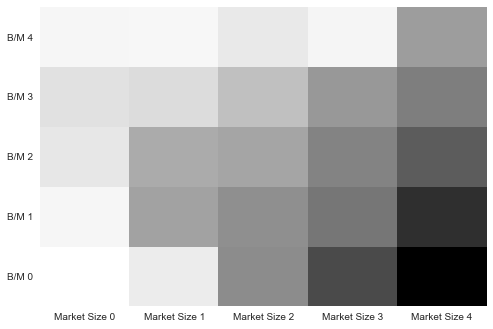

In [21]:
#plot the average excess return of 25 portfolios in a heatmap
plt.pcolor(avg_return)
plt.yticks(np.arange(0.5, len(avg_return.index), 1), avg_return.index)
plt.xticks(np.arange(0.5, len(avg_return.columns), 1), avg_return.columns)
plt.show()

In [22]:
#create class to run OLS for 25 portfolios
class famafrench():
    def __init__(self, y, start = '1963-7-1', end = '1990-12-1'):
        self.start = start
        self.end = end
        self.y = y[start:end]
    
    def __str__(self):
        return 'from %s to %s' %(self.start, self.end)

    def variables(self):
        x = ff3[self.start:self.end]
        y = self.y[self.start:self.end]
        return x, y

    def regression(self):
        x = self.variables()[0]
        x = sm.add_constant(x)
        y = self.variables()[1]
        model = sm.OLS(y,x)
        result = model.fit()

        return result

In [38]:
#get results from OLS
x = famafrench(p25_excess)
res = x.regression()
print(res.params)
print(dir(res))
type(res)
# res.rsquared()
# res.tvalues()
print(np.squeeze(np.array(res.rsquared)))

              0         1         2         3         4         5         6   \
const  -0.003828 -0.000930 -0.000768  0.000871  0.000597 -0.001255  0.000170   
Mkt-RF  1.046603  0.972848  0.938089  0.894567  0.954416  1.098883  1.019992   
SMB     1.388987  1.271877  1.152424  1.097745  1.189345  1.002405  0.940784   
HML    -0.295854  0.078804  0.263227  0.383254  0.620865 -0.481622  0.017782   

              7         8         9     ...           15        16        17  \
const   0.001284  0.001559  0.000638    ...     0.001143 -0.001210 -0.000034   
Mkt-RF  0.971872  0.973286  1.060355    ...     1.062428  1.076970  1.043237   
SMB     0.833638  0.698645  0.849039    ...     0.303937  0.263752  0.244960   
HML     0.237110  0.470338  0.694737    ...    -0.442799  0.017233  0.305987   

              18        19        20        21        22        23        24  
const   0.000631  0.000214  0.001897  0.000063 -0.000320 -0.000729 -0.001759  
Mkt-RF  1.038340  1.148459  0.951570  1.

ValueError: shapes (330,25) and (330,25) not aligned: 25 (dim 1) != 330 (dim 0)

In [54]:
#run OLS regresion without a class
x = ff3['1963-7-1':'1990-12-1']
x = sm.add_constant(x)
y = p25_excess['1963-7-1':'1990-12-1']
y0 = y.iloc[:, 0]

In [56]:
reg0 = sm.OLS(y0, x)
result0 = reg0.fit()
print(result0.summary())

                            OLS Regression Results                            
Dep. Variable:             SMALL LoBM   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1719.
Date:                Sun, 23 Jun 2019   Prob (F-statistic):          2.27e-199
Time:                        14:50:22   Log-Likelihood:                 838.41
No. Observations:                 330   AIC:                            -1669.
Df Residuals:                     326   BIC:                            -1654.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0038      0.001     -3.533      0.0

In [74]:
#run OLS regessions for 25 porfolios in a loop
models = []
for i in range (25):
    reg = sm.OLS(y.iloc[:, i], x)
    models.append(reg.fit())
print(models[0].params)
print(models[0].summary())


const    -0.003828
Mkt-RF    1.046603
SMB       1.388987
HML      -0.295854
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             SMALL LoBM   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1719.
Date:                Sun, 23 Jun 2019   Prob (F-statistic):          2.27e-199
Time:                        15:33:16   Log-Likelihood:                 838.41
No. Observations:                 330   AIC:                            -1669.
Df Residuals:                     326   BIC:                            -1654.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------

In [102]:
#summarize the 25 regression ouputs into one table
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}
           
results_table = summary_col(results= models,
                            stars = True,
                            model_names=y.columns.tolist(),
                            float_format ="%.2f",
                            info_dict = info_dict
                           )

results_table.add_title('Table - OLS Regressions')

print(results_table)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.

                                                                                                       Table - OLS Regressions
                 SMALL LoBM ME1 BM2 ME1 BM3 ME1 BM4 SMALL HiBM ME2 BM1  ME2 BM2 ME2 BM3 ME2 BM4 ME2 BM5 ME3 BM1  ME3 BM2 ME3 BM3 ME3 BM4 ME3 BM5 ME4 BM1  ME4 BM2 ME4 BM3 ME4 BM4 ME4 BM5 BIG LoBM ME5 BM2  ME5 BM3  ME5 BM4  BIG HiBM
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const            -0.00***   -0.00   -0.00   0.00    0.00       -0.00    0.00    0.00*   0.00**  0.00    -0.00    0.00    -0.00   0.00    0.00    0.00     -0.00   -0.00   0.00    0.00    0.00***  0.00     -0.00    -0.00    -0.00   
                 (0.00)     (0.00)  (0.00)  (0.00)  (0.00)     (0.00)   (0.00)  (0.00)  (0.00)  (0.00)  (0.00)   (0.00)  (0.00)  (0.00)  (0.00)  (0.00)   (0.00)  (0.00)  (0.00)  (0

In [94]:
print(y.columns[0:5])

Index(['SMALL LoBM', 'ME1 BM2', 'ME1 BM3', 'ME1 BM4', 'SMALL HiBM'], dtype='object')


In [112]:
#summarize the regression output of Small-size portfolios
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}
           
results_table_0 = summary_col(results= [models[0],models[1],models[2],models[3],models[4]],
                            stars = True,
                            model_names=y.columns[0:5].tolist(),
                            float_format ="%.2f",
                            info_dict = info_dict
                           )

results_table_0.add_title('Table - Small Size - OLS Regressions')

print(results_table_0)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.

             Table - Small Size - OLS Regressions
                 SMALL LoBM ME1 BM2 ME1 BM3 ME1 BM4 SMALL HiBM
--------------------------------------------------------------
const            -0.00***   -0.00   -0.00   0.00    0.00      
                 (0.00)     (0.00)  (0.00)  (0.00)  (0.00)    
Mkt-RF           1.05***    0.97*** 0.94*** 0.89*** 0.95***   
                 (0.03)     (0.02)  (0.02)  (0.02)  (0.02)    
SMB              1.39***    1.27*** 1.15*** 1.10*** 1.19***   
                 (0.04)     (0.03)  (0.02)  (0.02)  (0.02)    
HML              -0.30***   0.08**  0.26*** 0.38*** 0.62***   
                 (0.04)     (0.03)  (0.03)  (0.03)  (0.03)    
R-squared        0.94       0.96    0.96    0.96    0.96      
No. observations 330        330     330     330     330       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [113]:
#summarize the regression output of size-1 portfolios
results_table_1 = summary_col(results= [models[5],models[6],models[7],models[8],models[9]],
                            stars = True,
                            model_names=y.columns[5:10].tolist(),
                            float_format ="%.2f",
                            info_dict = info_dict
                           )

results_table_1.add_title('Table - Size 1 - OLS Regressions')

print(results_table_1)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.

            Table - Size 1 - OLS Regressions
                 ME2 BM1  ME2 BM2 ME2 BM3 ME2 BM4 ME2 BM5
---------------------------------------------------------
const            -0.00    0.00    0.00*   0.00**  0.00   
                 (0.00)   (0.00)  (0.00)  (0.00)  (0.00) 
Mkt-RF           1.10***  1.02*** 0.97*** 0.97*** 1.06***
                 (0.02)   (0.02)  (0.02)  (0.02)  (0.02) 
SMB              1.00***  0.94*** 0.83*** 0.70*** 0.85***
                 (0.03)   (0.03)  (0.02)  (0.02)  (0.03) 
HML              -0.48*** 0.02    0.24*** 0.47*** 0.69***
                 (0.04)   (0.03)  (0.03)  (0.03)  (0.03) 
R-squared        0.96     0.96    0.96    0.96    0.96   
No. observations 330      330     330     330     330    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [115]:
#summarize the regression output of size-2 portfolios
results_table_2 = summary_col(results= [models[10],models[11],models[12],models[13],models[14]],
                            stars = True,
                            model_names=y.columns[10:15].tolist(),
                            float_format ="%.2f",
                            info_dict = info_dict
                           )

results_table_2.add_title('Table - Size 2 - OLS Regressions')

print(results_table_2)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.

            Table - Size 2 - OLS Regressions
                 ME3 BM1  ME3 BM2 ME3 BM3 ME3 BM4 ME3 BM5
---------------------------------------------------------
const            -0.00    0.00    -0.00   0.00    0.00   
                 (0.00)   (0.00)  (0.00)  (0.00)  (0.00) 
Mkt-RF           1.10***  1.02*** 0.97*** 0.97*** 1.05***
                 (0.02)   (0.02)  (0.02)  (0.02)  (0.02) 
SMB              0.71***  0.63*** 0.54*** 0.45*** 0.66***
                 (0.03)   (0.03)  (0.03)  (0.03)  (0.03) 
HML              -0.43*** 0.04    0.30*** 0.51*** 0.70***
                 (0.03)   (0.03)  (0.03)  (0.03)  (0.03) 
R-squared        0.96     0.95    0.93    0.94    0.93   
No. observations 330      330     330     330     330    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [116]:
#summarize the regression output of size-3 portfolios
results_table_3 = summary_col(results= [models[15],models[16],models[17],models[18],models[19]],
                            stars = True,
                            model_names=y.columns[15:20].tolist(),
                            float_format ="%.2f",
                            info_dict = info_dict
                           )

results_table_3.add_title('Table - Size 3 - OLS Regressions')

print(results_table_3)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.

            Table - Size 3 - OLS Regressions
                 ME4 BM1  ME4 BM2 ME4 BM3 ME4 BM4 ME4 BM5
---------------------------------------------------------
const            0.00     -0.00   -0.00   0.00    0.00   
                 (0.00)   (0.00)  (0.00)  (0.00)  (0.00) 
Mkt-RF           1.06***  1.08*** 1.04*** 1.04*** 1.15***
                 (0.02)   (0.02)  (0.02)  (0.02)  (0.03) 
SMB              0.30***  0.26*** 0.24*** 0.23*** 0.37***
                 (0.03)   (0.03)  (0.03)  (0.03)  (0.04) 
HML              -0.44*** 0.02    0.31*** 0.57*** 0.74***
                 (0.03)   (0.03)  (0.03)  (0.03)  (0.04) 
R-squared        0.95     0.92    0.91    0.91    0.90   
No. observations 330      330     330     330     330    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [118]:
#summarize the regression output of Large-eize portfolios
results_table_4 = summary_col(results= [models[20],models[21],models[22],models[23],models[24]],
                            stars = True,
                            model_names=y.columns[20:25].tolist(),
                            float_format ="%.2f",
                            info_dict = info_dict
                           )

results_table_4.add_title('Table - Large Size - OLS Regressions')

print(results_table_4)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.

            Table - Large Size - OLS Regressions
                 BIG LoBM ME5 BM2  ME5 BM3  ME5 BM4  BIG HiBM
-------------------------------------------------------------
const            0.00***  0.00     -0.00    -0.00    -0.00   
                 (0.00)   (0.00)   (0.00)   (0.00)   (0.00)  
Mkt-RF           0.95***  1.02***  0.97***  1.01***  1.01*** 
                 (0.02)   (0.02)   (0.02)   (0.02)   (0.03)  
SMB              -0.20*** -0.20*** -0.27*** -0.20*** -0.03   
                 (0.03)   (0.03)   (0.03)   (0.03)   (0.04)  
HML              -0.44*** -0.03    0.19***  0.56***  0.75*** 
                 (0.03)   (0.03)   (0.04)   (0.03)   (0.04)  
R-squared        0.94     0.92     0.86     0.91     0.83    
No. observations 330      330      330      330      330     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
# TAKEAWAYS:
# Almost all portfolios (except for 1) have R-square higher than 90%
# Most of the constant terms are insignificant
# All portfolios have excess returns in positive correlation with market excess return. Ususally mid-size companies have higher correlation with market excess return.
# Smaller companies have stronger positive correlation with SMB factor, which meant to mimic the risk factor in returns related to size. For the largest companies, the correlation turns negative.
# No consistent pattern is observed for HML factor across companies with different sizes
# Companies with higher B/M ratios will have stronger positive correlation with HML factor, which meant to mimic the risk factor in returns related B/M equity. For the companies with lowest B/M ratio, the correlation turns negative.
# Usually, companies with the lowest and highest B/M ratios will have stronger correlation with SMB factor.
# The last bulletpoint is intuitive as 1.low B/M ratio is usually because of high market value, thus the company is more likely to fall in the larger-size portfolios. 2. high B/M ratio is usually due to low market value, and thus the company is more likely to fall into the small-size portfolio.

In [ ]:
# Problems to solve:
# how to run the regressions in a class and extract statistics out of it
# how to construct a better consolidated table for all the regresion reults. And how to visulize the results better.
# use up-to-date data to run regressions, and if the results are weaker, try expanding window to check the pattern.
# how to plot 3-D bars
# how to do prediction with 3-factor model